In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
from functools import reduce
import rioxarray
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 30}) 

In [2]:
tmax = xr.open_dataset("./data/tmax_data_00_23.nc")
tmax = tmax.rio.write_crs("EPSG:4326")

sm = xr.open_dataset("./data/sm_data_00_23.nc")
sm = sm.rio.write_crs("EPSG:4326")
sm= sm.assign_coords(year = sm['time'].dt.year, 
                         month = sm['time'].dt.month).set_index(time=['year', 'month']).unstack('time')

csif =  xr.open_dataset("./data/csif_data_updated.nc").set_index(location=["lat", "lon"]).unstack("location") 
csif = csif.where(csif> 0)
csif = csif.rio.set_spatial_dims(x_dim="lon", y_dim="lat")
csif = csif.rio.write_crs("EPSG:4326")

shp_path = "./data/icrisat_boundary_match.shp" 
gdf_icri = gpd.read_file(shp_path)

### csif

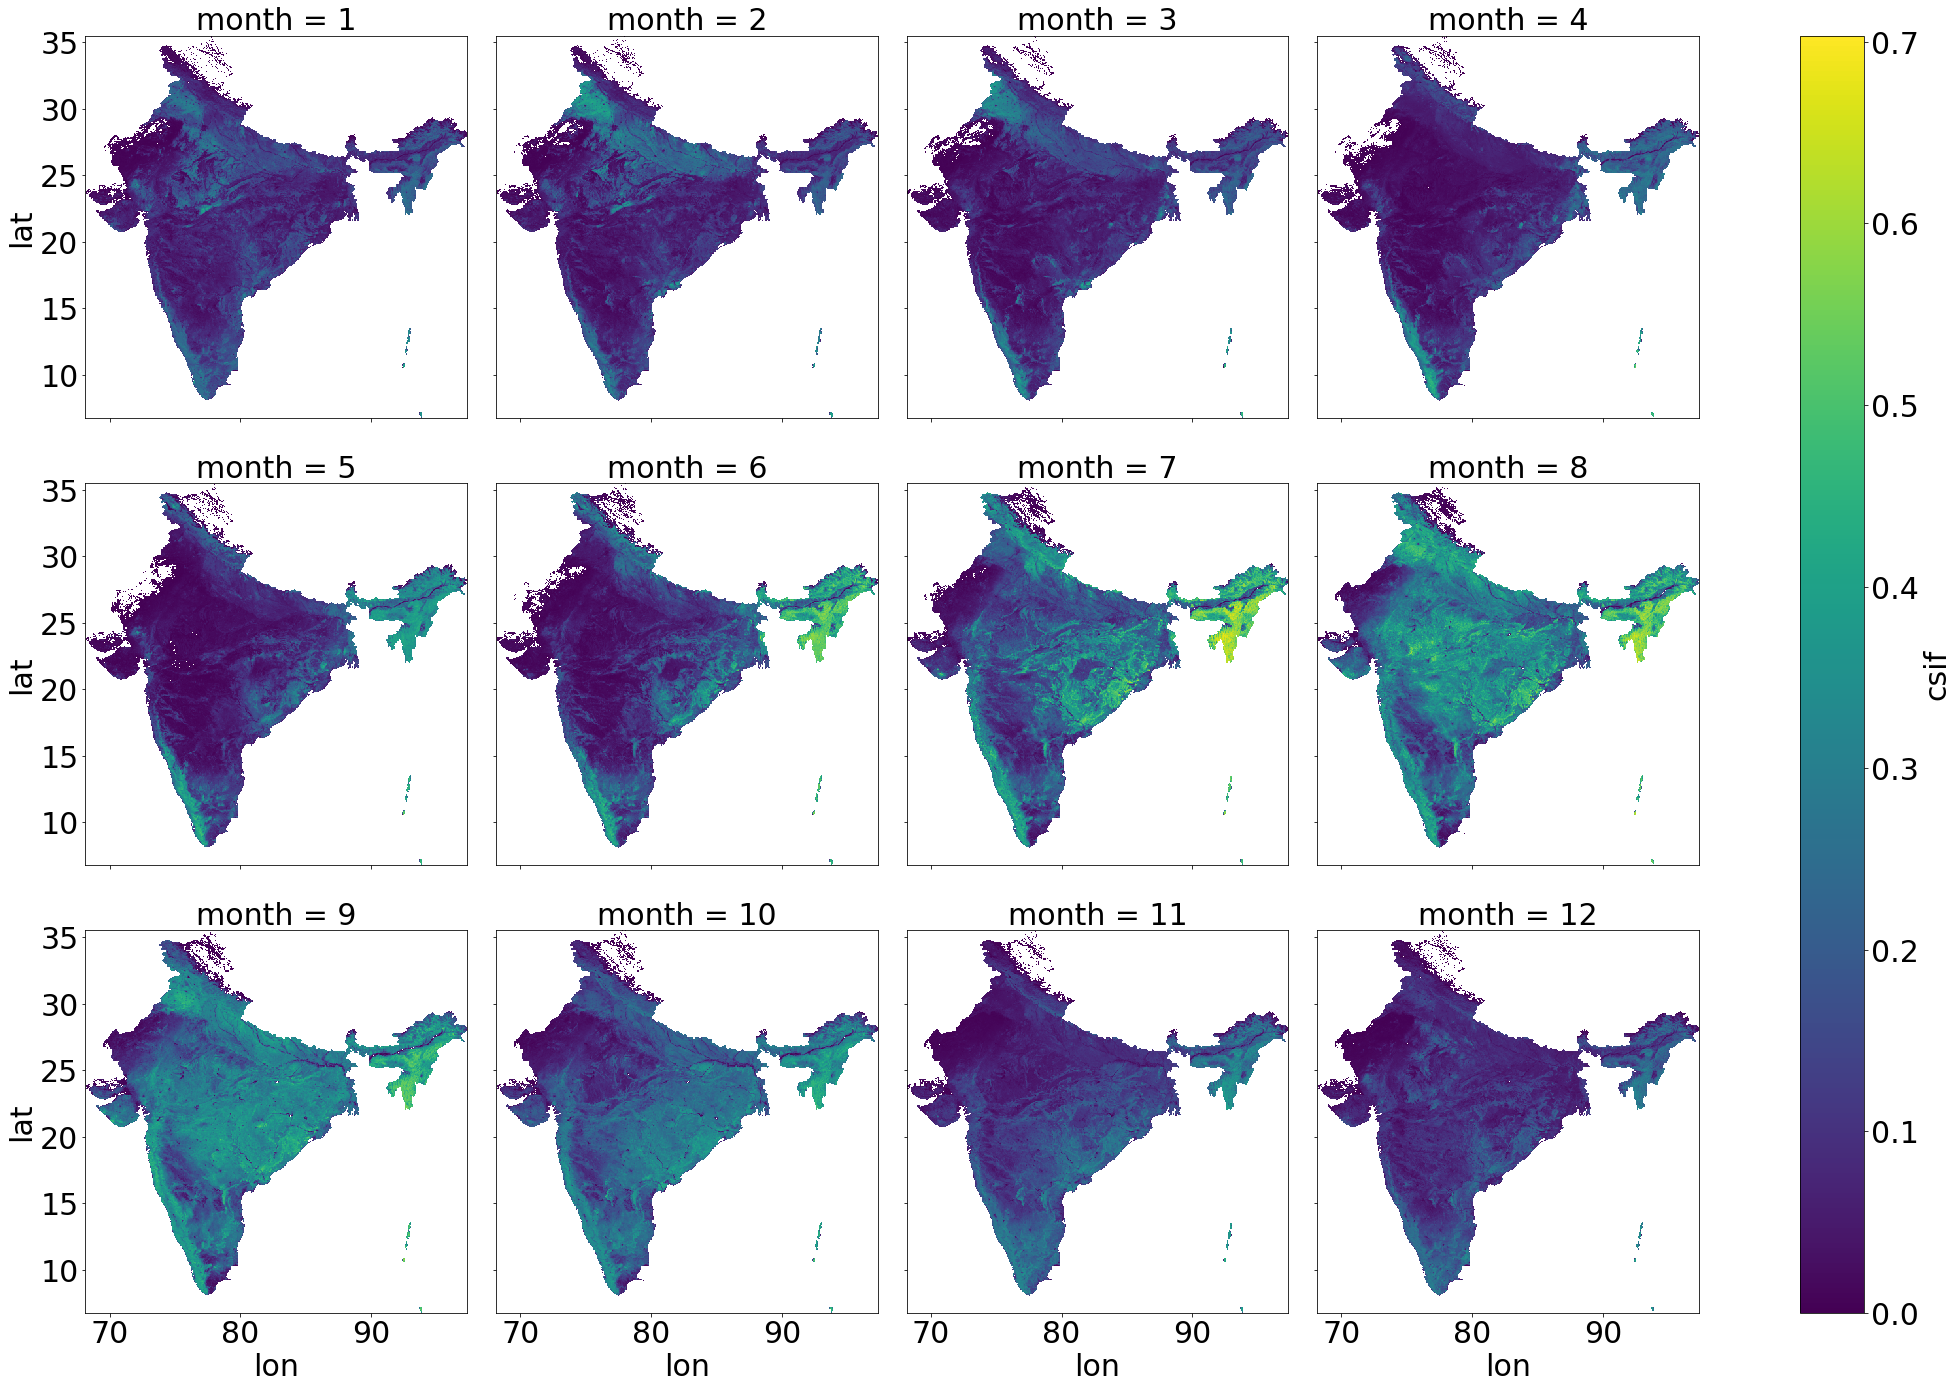

In [3]:
## monthly CSIF, averaged across 2000-2023

forplot = csif['csif'].groupby('month').mean('year')
plot =forplot.plot(x="lon", y="lat", cmap="viridis", vmin=0, col="month", col_wrap=4, figsize=(30,20))    
#plt.savefig("./plots/monthly_avg_csif.png")

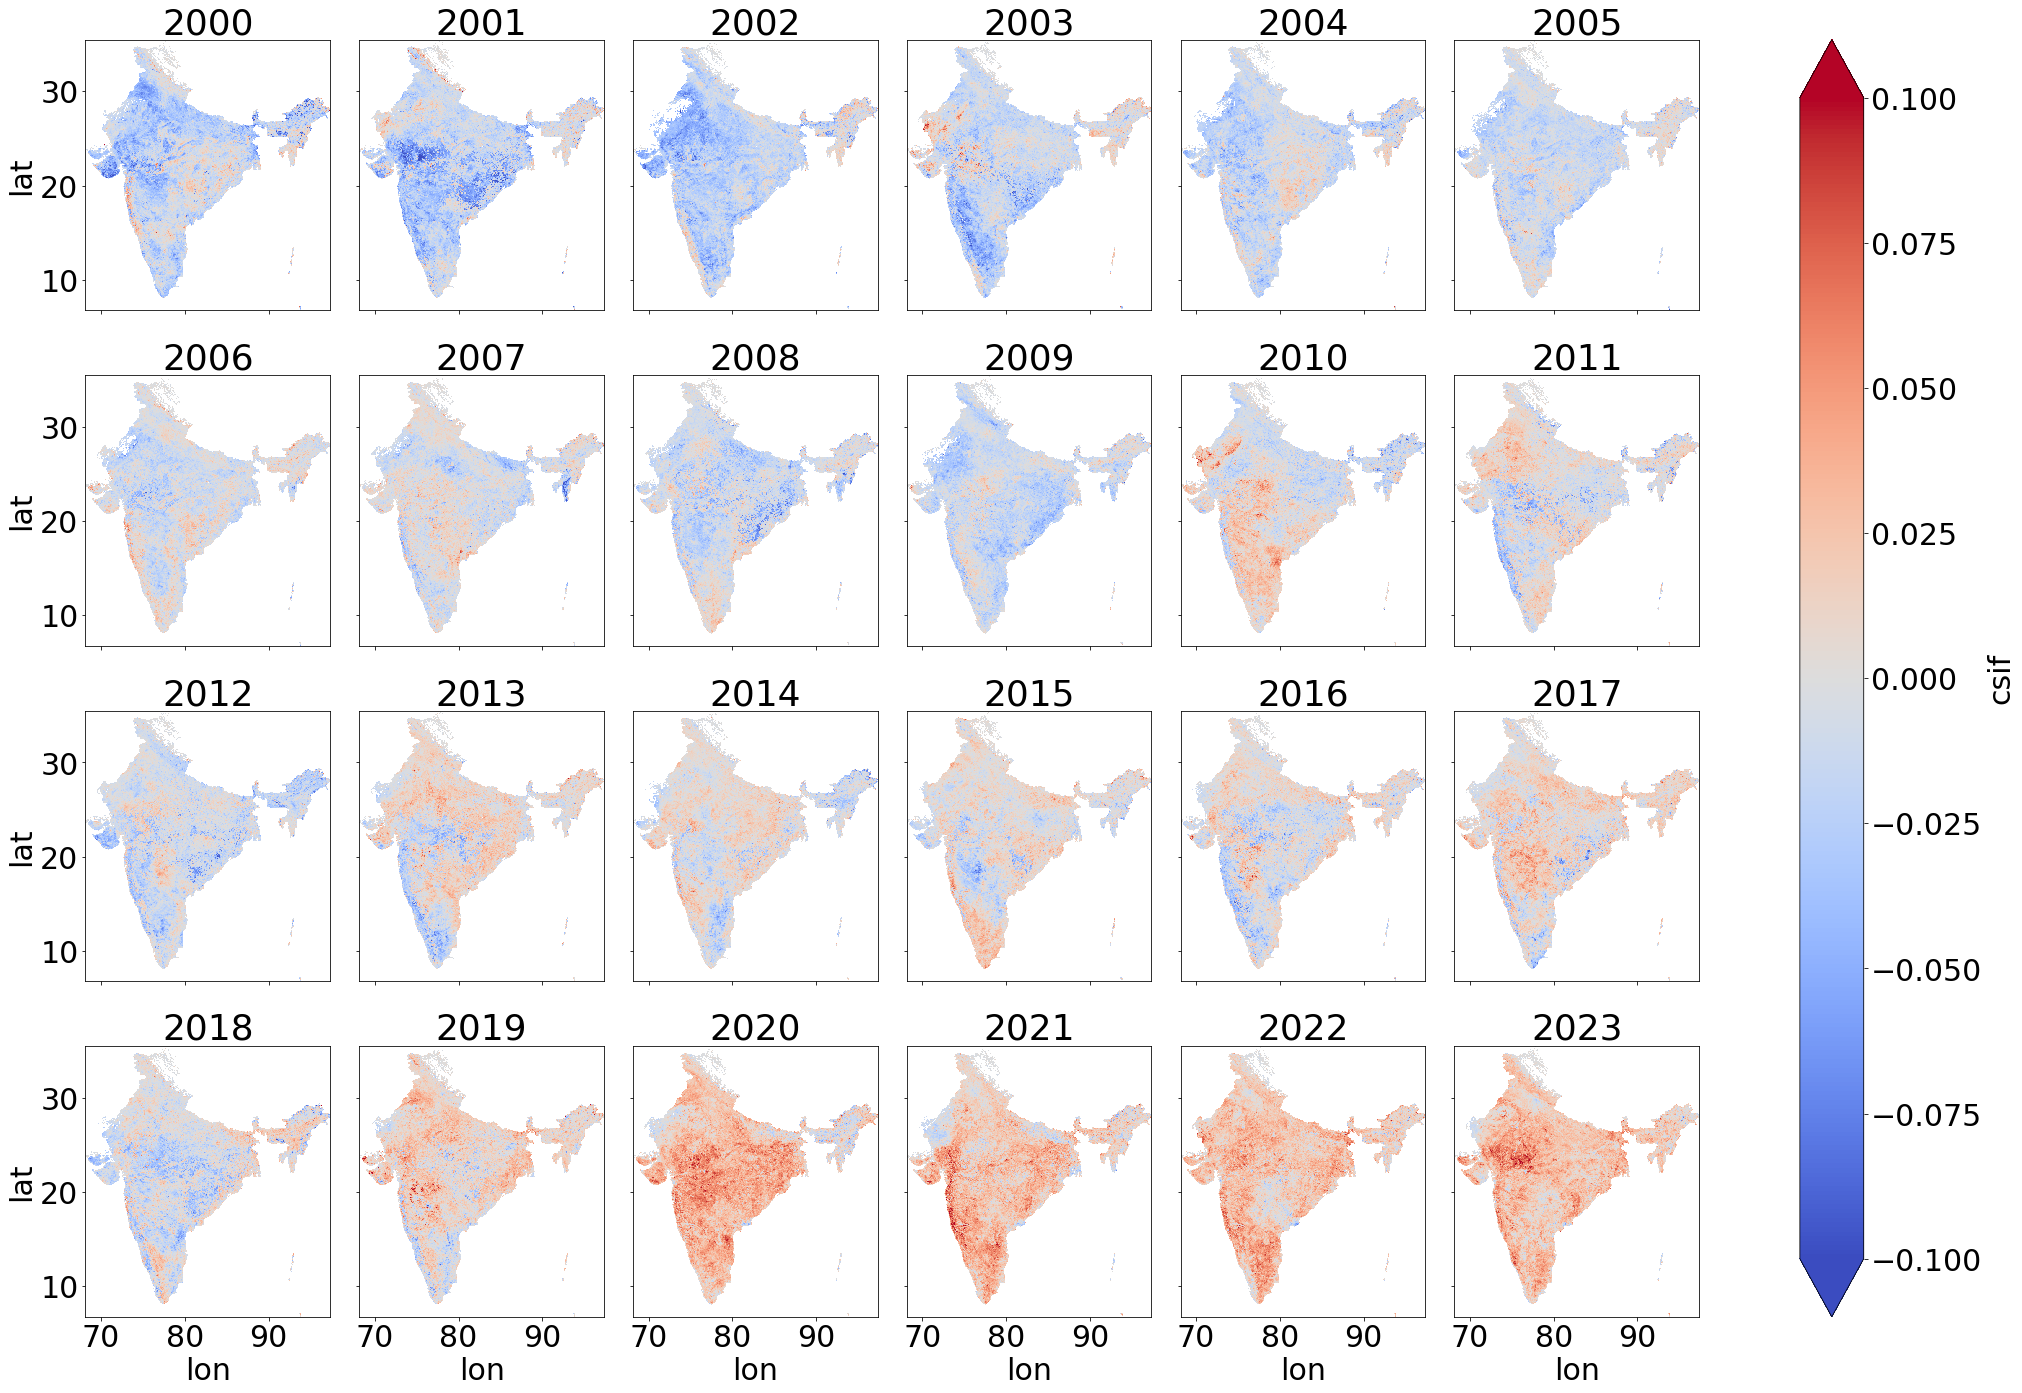

In [4]:
## yearly CSIF anomaly from 2000-2023 mean 

csif_mean = csif['csif'].mean(dim=['year', 'month'])
#csif_std = csif['csif'].std(dim=['year', 'month'])
csif_anomaly = csif['csif'].mean(dim='month')
csif_anomaly = csif_anomaly - csif_mean
fig = csif_anomaly.plot(x="lon", y="lat", cmap="coolwarm", col="year", vmin= -0.1, vmax=0.1, col_wrap=6, figsize=(30,20))    

for ax, title in zip(fig.axs.flat, fig.col_names):
    ax.set_title(f"{int(title)}") 
#plt.savefig("./plots/anomaly_csif.png")

### tmax

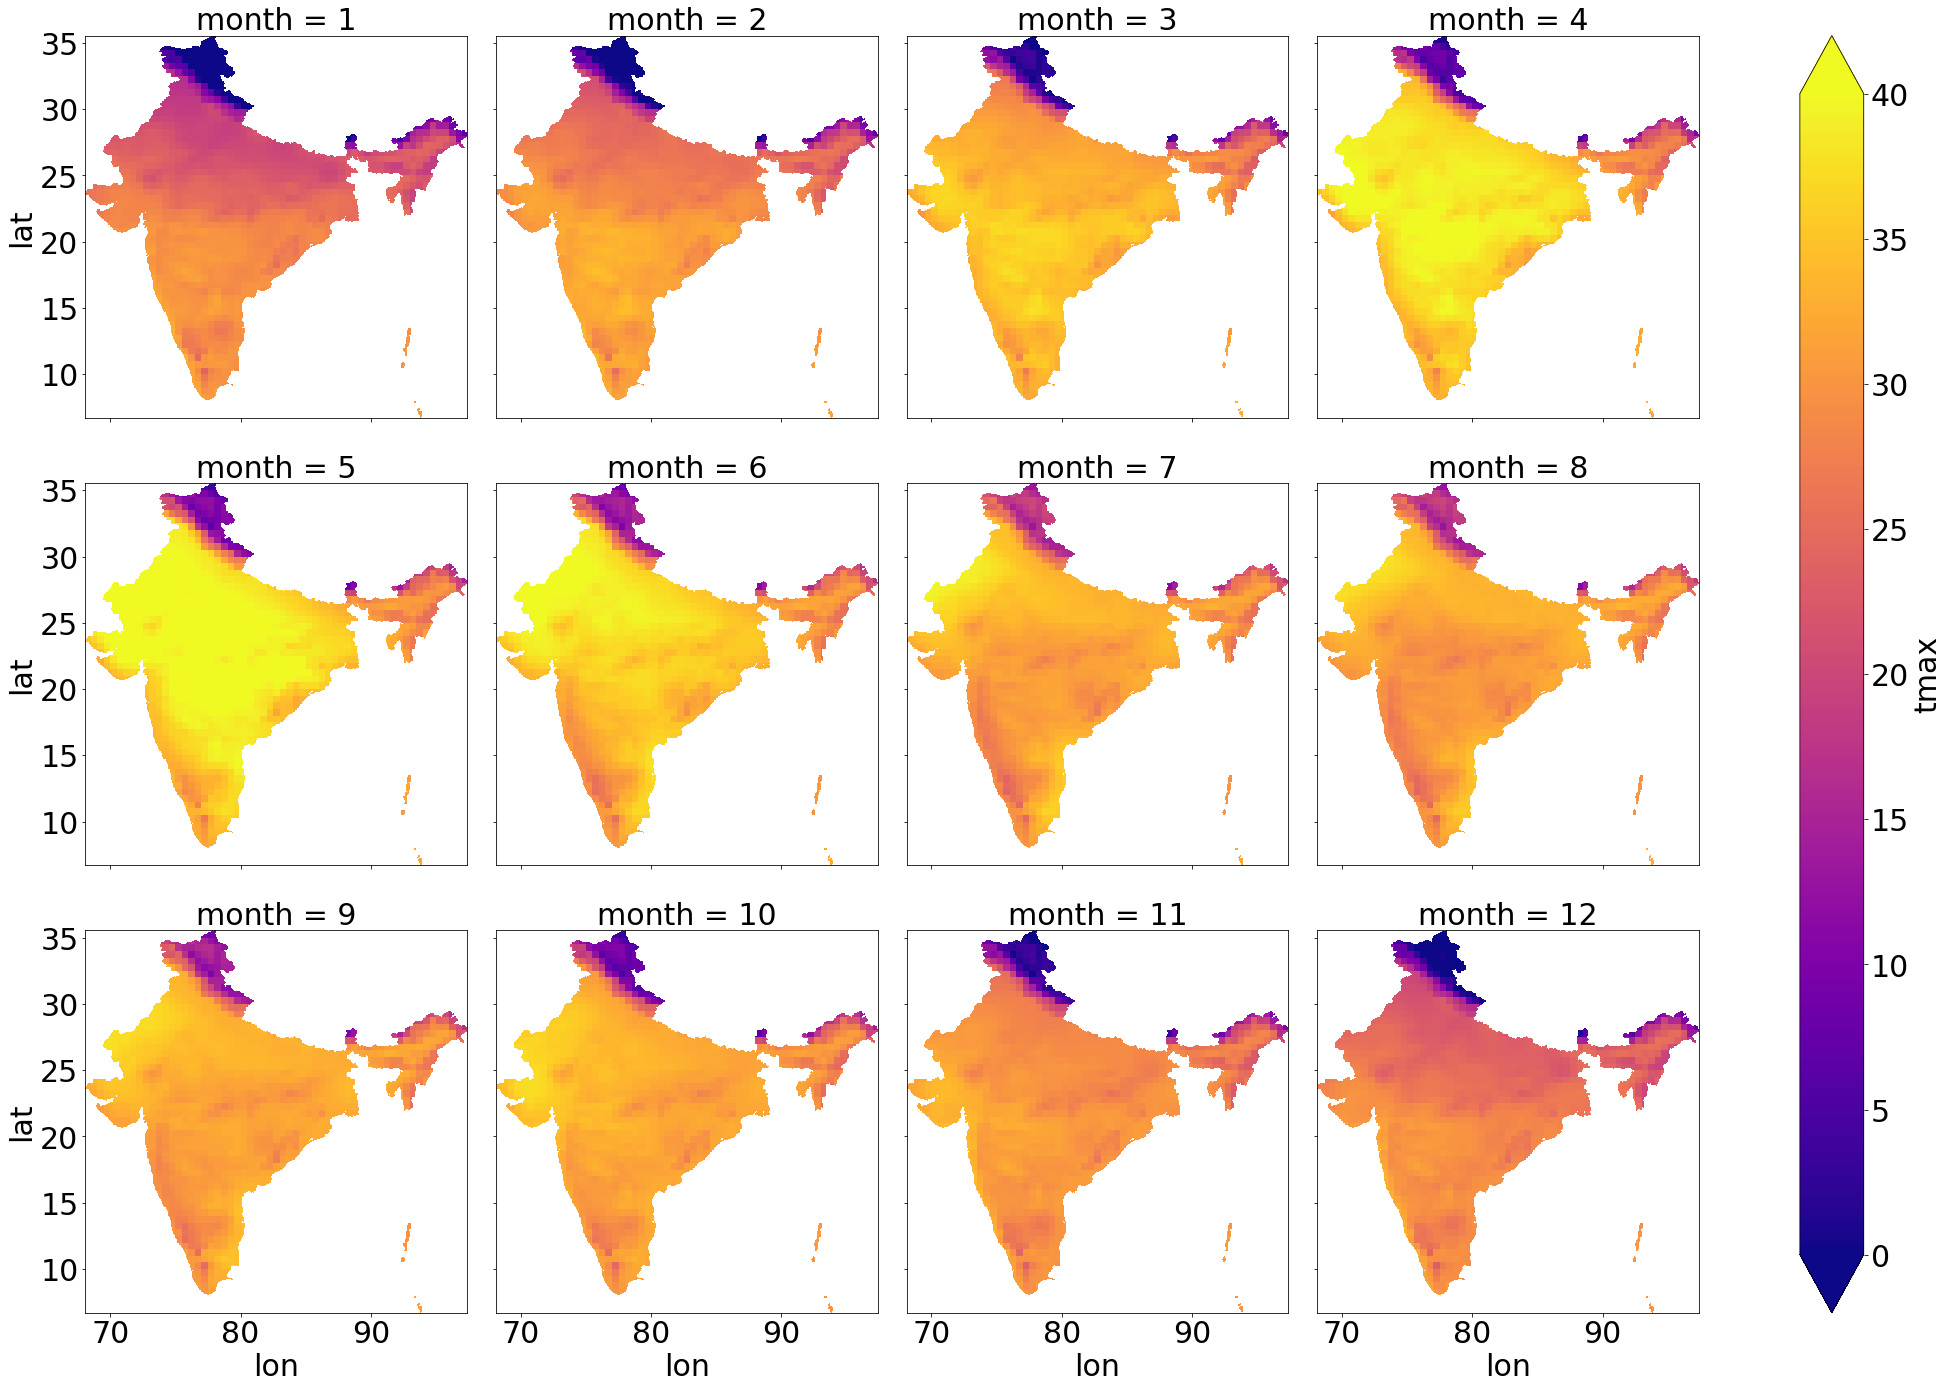

In [5]:
## monthly tmax, averaged across 2000-2023

forplot = tmax['tmax'].groupby('month').mean('year')
forplot.plot(x="lon", y="lat", cmap="plasma", col="month", vmin=0, vmax=40, col_wrap=4, figsize=(30,20))    
#plt.savefig("./plots/monthly_avg_tmax.png") 

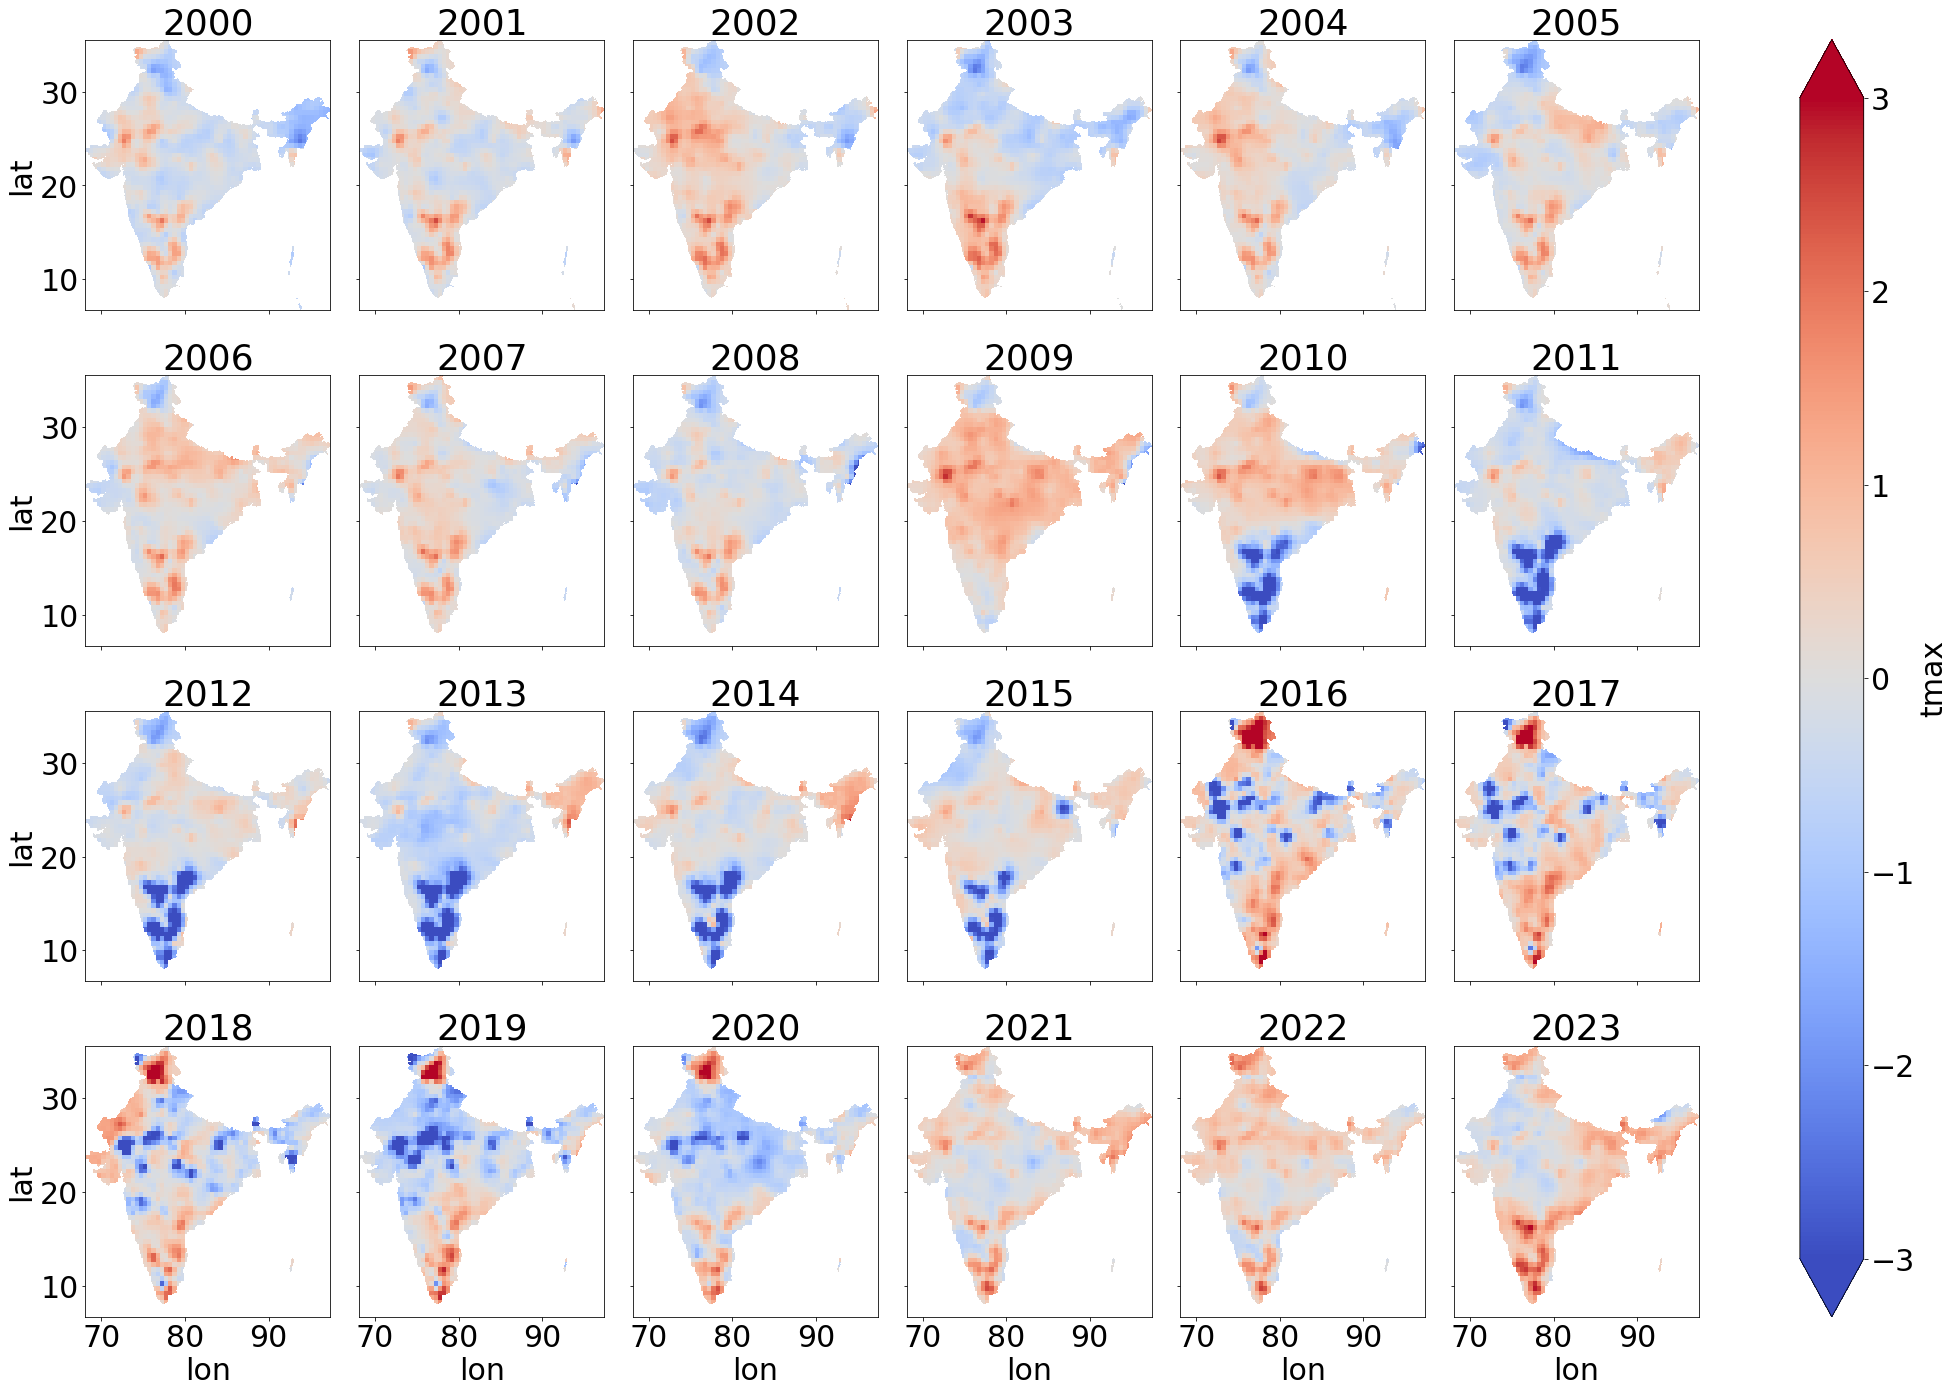

In [6]:
## yearly tmax anomaly from 2000-2023 mean

clim_mean = tmax['tmax'].mean(dim=['year', 'month'])
#clim_std = tmax['tmax'].std(dim=['year', 'month'])
clim_anomaly = tmax['tmax'].mean(dim='month')
clim_anomaly = clim_anomaly - clim_mean

fig = clim_anomaly.plot(x="lon", y="lat", cmap="coolwarm",  col="year", vmin=-3, vmax=3, col_wrap=6, figsize=(30,20))    

for ax, title in zip(fig.axs.flat, fig.col_names):
    ax.set_title(f"{int(title)}") 
#plt.savefig("./plots/anomaly_tmax.png")

### sm

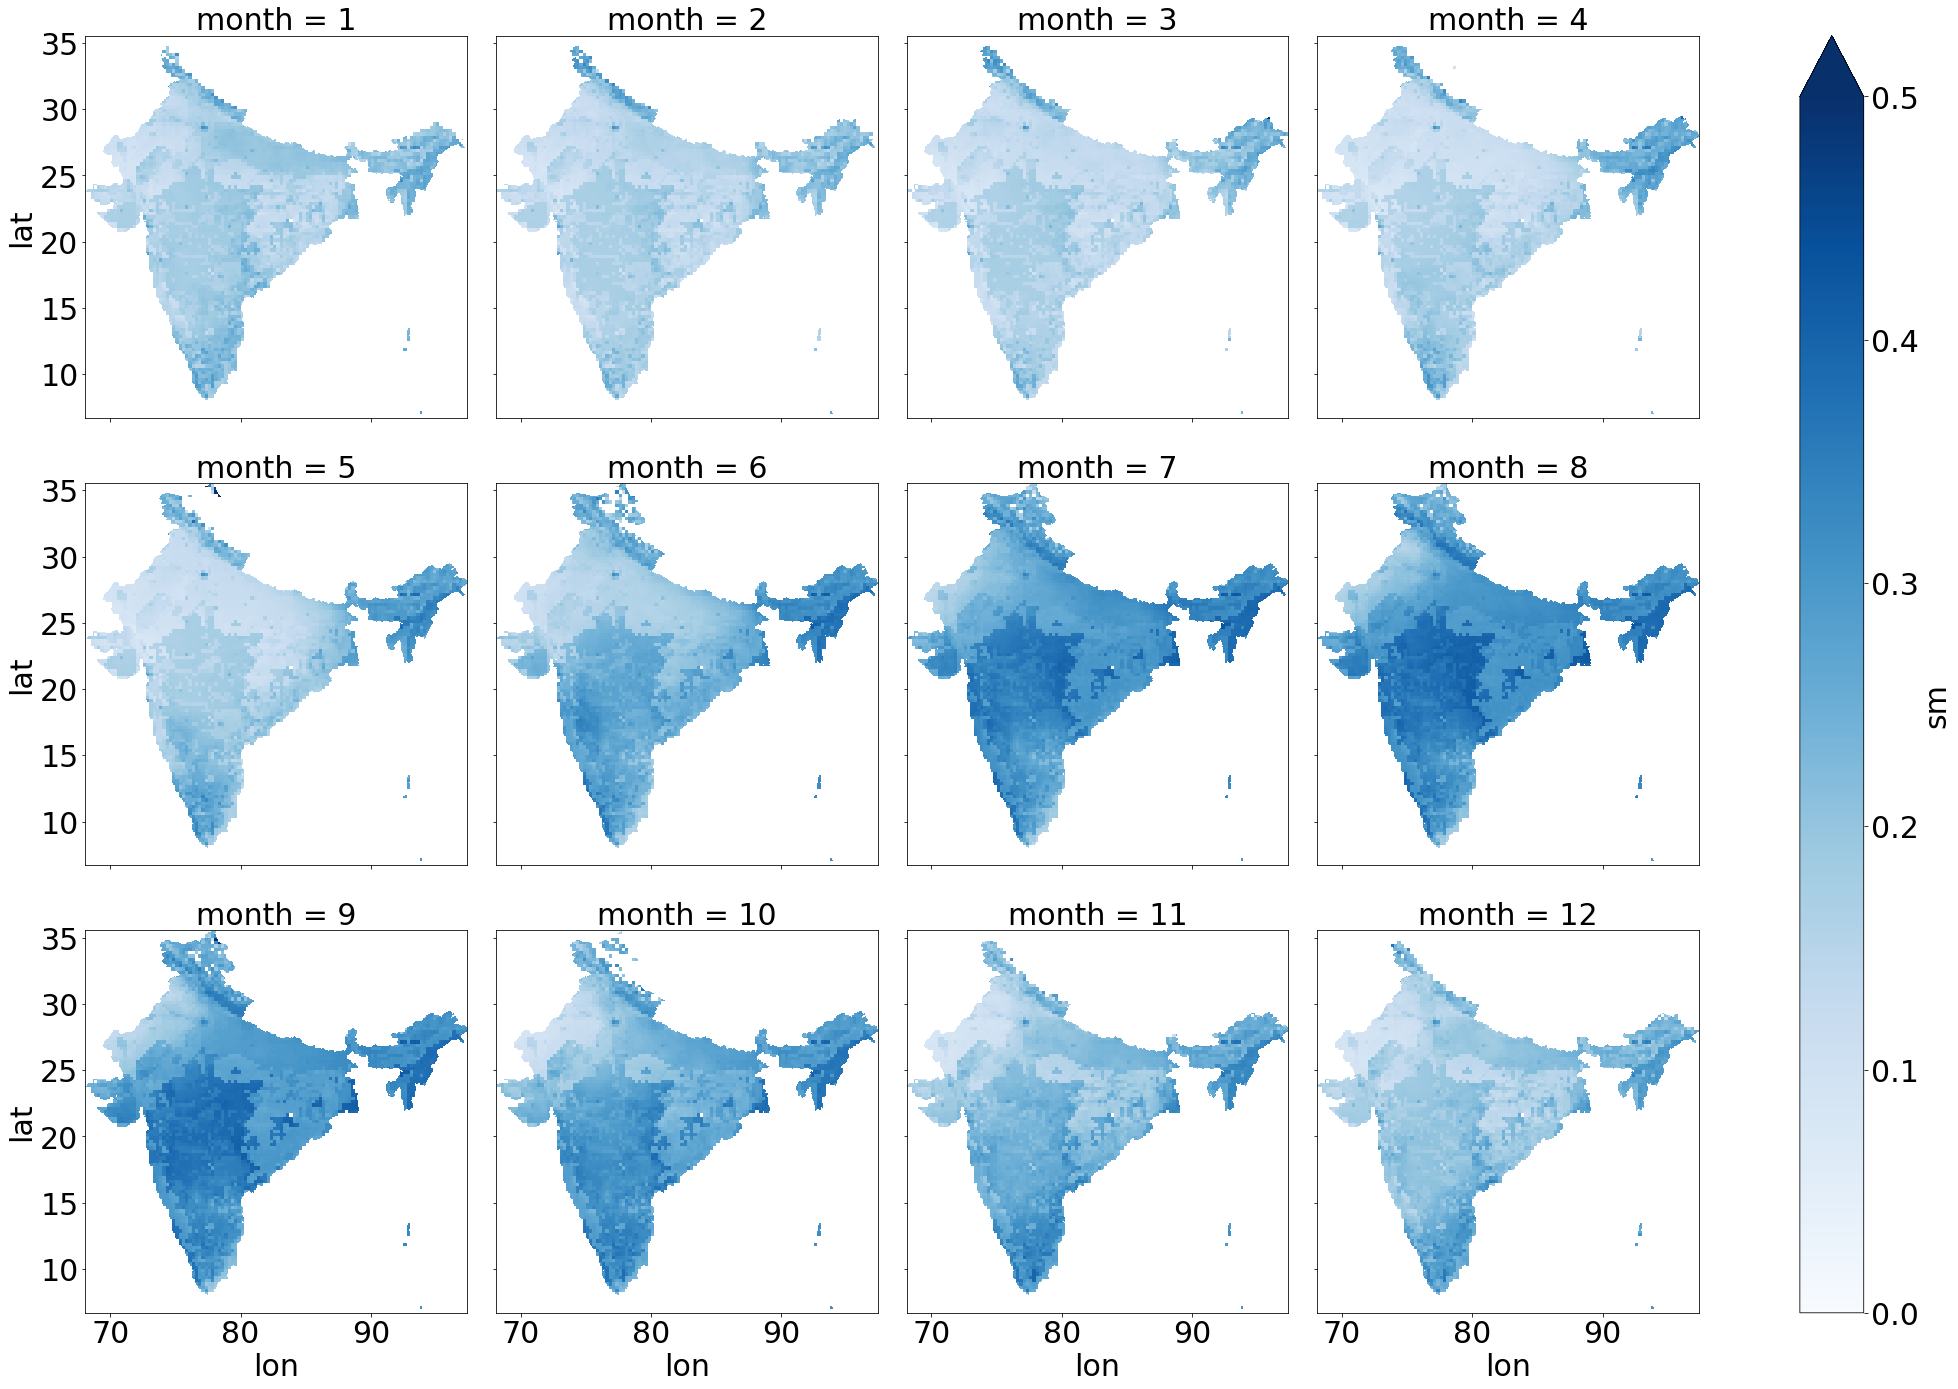

In [7]:
## monthly sm, averaged across 2000-2023

forplot = sm['sm'].groupby('month').mean('year')
forplot.plot(x="lon", y="lat", cmap="Blues", col="month", vmin=0, vmax=0.5, col_wrap=4, figsize=(30,20))    
#plt.savefig("./plots/monthly_avg_sm.png") 

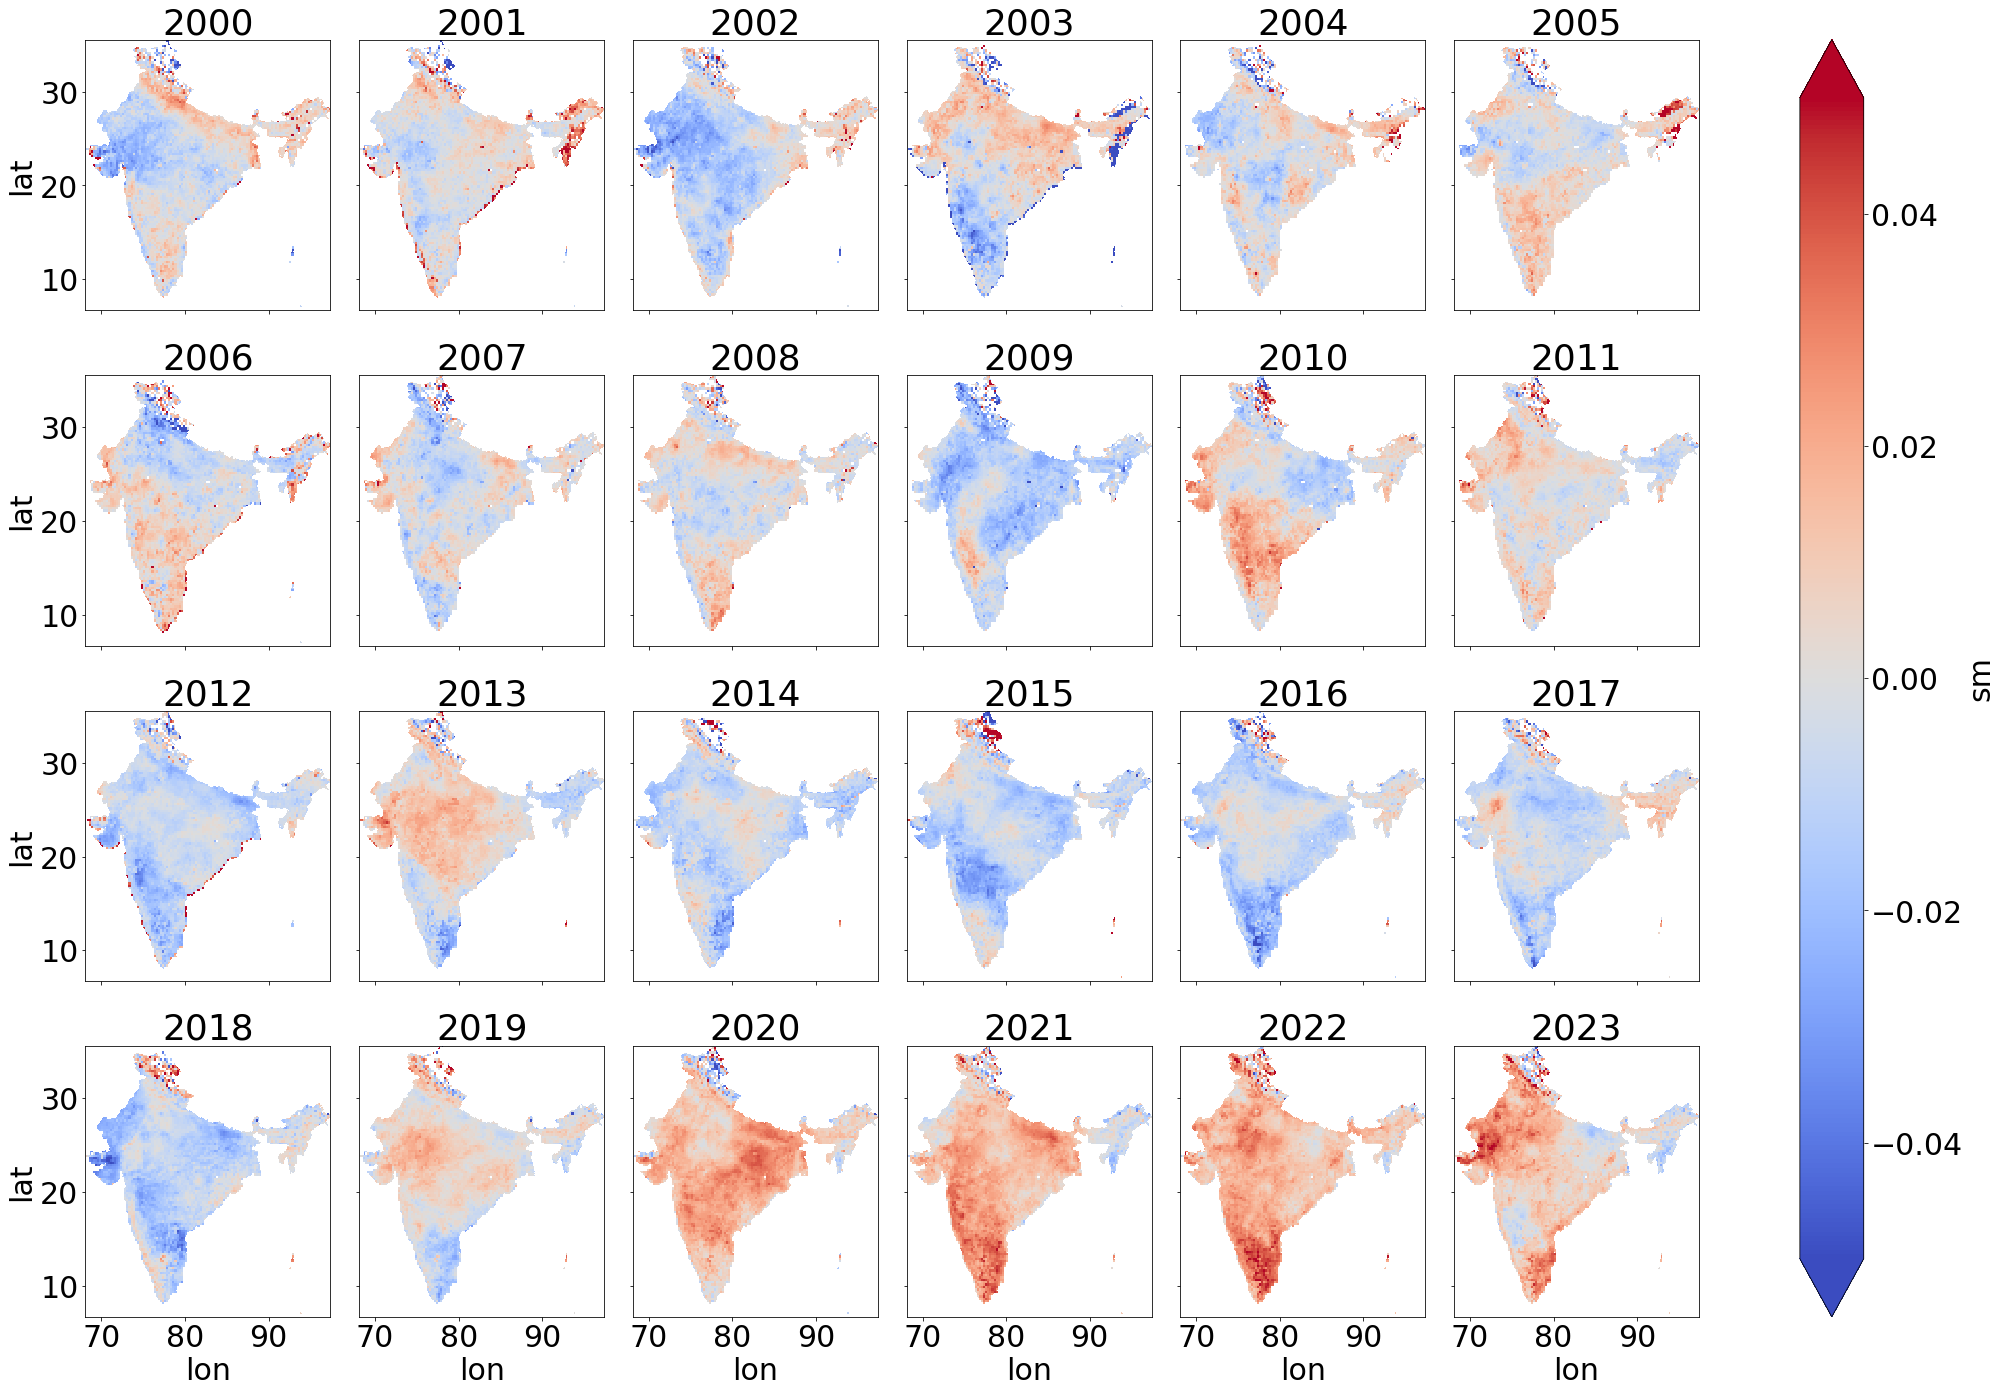

In [8]:
## yearly sm anomaly from 2000-2023 mean

clim_mean = sm['sm'].mean(dim=['year', 'month'])
#clim_std = sm['sm'].std(dim=['year', 'month'])
clim_anomaly = sm['sm'].mean(dim='month')
clim_anomaly = clim_anomaly - clim_mean

fig = clim_anomaly.plot(x="lon", y="lat", cmap="coolwarm",  col="year", vmin= -0.05, vmax=0.05, col_wrap=6, figsize=(30,20))    

for ax, title in zip(fig.axs.flat, fig.col_names):
    ax.set_title(f"{int(title)}") 
#plt.savefig("./plots/anomaly_sm.png")